In [1]:
import tensorflow as tf 
import numpy as np 
import gdal
from osgeo import gdal_array
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [2]:
indir = "/Users/alexandrabjanes/MT/Samples11x11/"

In [3]:
from numpy import load

filenum=0
directory = os.fsencode(indir)
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.endswith('.npy'):
        filenum += 1
        d = load(indir+filename)
        print(d.shape)
        if filenum == 1:
            Dataset = d
        else:
            Dataset = np.concatenate((Dataset, d), axis=0)


(676, 11, 11, 15)
(570, 11, 11, 15)
(806, 11, 11, 15)
(340, 11, 11, 15)
(4, 11, 11, 15)
(4, 11, 11, 15)
(4, 11, 11, 15)
(24, 11, 11, 15)
(182, 11, 11, 15)
(292, 11, 11, 15)
(856, 11, 11, 15)
(902, 11, 11, 15)
(738, 11, 11, 15)
(634, 11, 11, 15)
(174, 11, 11, 15)
(4, 11, 11, 15)
(6, 11, 11, 15)
(114, 11, 11, 15)
(334, 11, 11, 15)
(738, 11, 11, 15)
(1122, 11, 11, 15)
(1126, 11, 11, 15)
(922, 11, 11, 15)
(348, 11, 11, 15)
(32, 11, 11, 15)
(2, 11, 11, 15)
(2, 11, 11, 15)
(4, 11, 11, 15)
(12, 11, 11, 15)
(28, 11, 11, 15)
(148, 11, 11, 15)
(498, 11, 11, 15)
(856, 11, 11, 15)
(1048, 11, 11, 15)
(926, 11, 11, 15)
(162, 11, 11, 15)
(2, 11, 11, 15)
(2, 11, 11, 15)
(68, 11, 11, 15)
(48, 11, 11, 15)
(258, 11, 11, 15)
(486, 11, 11, 15)
(1062, 11, 11, 15)
(370, 11, 11, 15)
(360, 11, 11, 15)
(174, 11, 11, 15)
(2, 11, 11, 15)
(2, 11, 11, 15)
(2, 11, 11, 15)
(36, 11, 11, 15)
(180, 11, 11, 15)
(436, 11, 11, 15)
(886, 11, 11, 15)
(822, 11, 11, 15)
(608, 11, 11, 15)
(114, 11, 11, 15)
(4, 11, 11, 15)
(2, 1

In [4]:
Dataset.shape

(21206, 11, 11, 15)

In [5]:
data=Dataset[:,:,:,1:15]
target_0=Dataset[:,:,:,0]

print(data.shape)
print(target_0.shape)

(21206, 11, 11, 14)
(21206, 11, 11)


In [6]:
target=target_0[:,5,5]
target=np.expand_dims(target, axis=1)
print(target.shape)
print(target[0:20,:])

(21206, 1)
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [39]:
import gdal
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(11, 11, 14)))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same',))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(.3))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2, activation='softmax'))


model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 11, 11, 64)        8128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 2, 256)         295168    
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [40]:
from keras.optimizers import RMSprop
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.9, beta_2=0.9999, epsilon=1e-07, amsgrad=False, name='Adam'),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.7, patience=3, min_lr=0.0005, verbose=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=6)

In [41]:
history = model.fit(X_train, y_train, epochs=200, 
                    validation_data=(X_test, y_test))

Train on 16964 samples, validate on 4242 samples
Epoch 1/200
16964/16964 [==============================] - 22s 1ms/sample - loss: 12.1528 - accuracy: 0.5131 - val_loss: 1.1477 - val_accuracy: 0.5151
Epoch 2/200
16964/16964 [==============================] - 20s 1ms/sample - loss: 1.1192 - accuracy: 0.5164 - val_loss: 0.9916 - val_accuracy: 0.5182
Epoch 3/200
16964/16964 [==============================] - 20s 1ms/sample - loss: 0.9824 - accuracy: 0.5039 - val_loss: 0.9645 - val_accuracy: 0.5146
Epoch 4/200
16964/16964 [==============================] - 20s 1ms/sample - loss: 0.9537 - accuracy: 0.5093 - val_loss: 0.9441 - val_accuracy: 0.5210
Epoch 5/200
16964/16964 [==============================] - 19s 1ms/sample - loss: 0.9651 - accuracy: 0.5220 - val_loss: 0.9395 - val_accuracy: 0.5603
Epoch 6/200
16964/16964 [==============================] - 19s 1ms/sample - loss: 0.9520 - accuracy: 0.5293 - val_loss: 0.9399 - val_accuracy: 0.5636
Epoch 7/200
16964/16964 [=========================

KeyboardInterrupt: 

4242/1 - 2s - loss: 1.4336 - accuracy: 0.6938


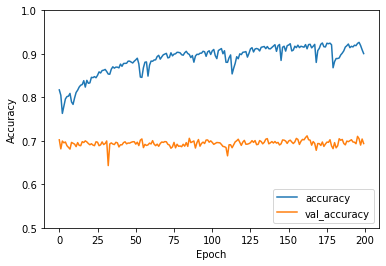

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [28]:
model.save_weights('/Users/alexandrabjanes/MT/Codigos/Checkpoints/checkpoint6')